# Some common statistical tests using the python `pingouin` library

# Import relevant libraries

In [ ]:
import pingouin as pg
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()

# Generate some synthetic data

In [93]:
# Define data structure
data = {
    'participant': np.tile(np.arange(1, 201), 3),
    'condition': np.repeat(['Condition1', 'Condition2', 'Condition3'], 200)
}

# Define non-uniform distribution for scores
scores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
score_probabilities = [0.05, 0.05, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.05, 0.05]

# Generate non-uniform scores
data['score'] = np.random.choice(scores, size=600, p=score_probabilities)

# Define non-uniform distribution for incomes
incomes = [30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
income_probabilities = [0.22222222, 0.19444444, 0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556, 0.02777778]

# Generate non-uniform incomes
data['income'] = np.random.choice(incomes, size=600, p=income_probabilities)

# Create a DataFrame
df = pd.DataFrame(data)

# Create mappings for age and favourite_colour
np.random.seed(0)  # For reproducibility
participant_ids = np.arange(1, 201)
ages = np.random.randint(18, 65, 200)
colours = np.random.choice(['Red', 'Blue', 'Green', 'Yellow', 'Purple', 'Orange', 'Pink'], 200)
genders = np.random.choice(['Male', 'Female'], 200)

age_mapping = dict(zip(participant_ids, ages))
colour_mapping = dict(zip(participant_ids, colours))
gender_mapping = dict(zip(participant_ids, genders))

# Assign age, favourite_colour, and gender based on the mapping
df['age'] = df['participant'].map(age_mapping)
df['favourite_colour'] = df['participant'].map(colour_mapping)
df['gender'] = df['participant'].map(gender_mapping)




    participant   condition  score  income  age favourite_colour  gender
0             1  Condition1      7   60000   62             Pink  Female
1             2  Condition1      5   50000   18           Purple    Male
2             3  Condition1      3   30000   21              Red  Female
3             4  Condition1      3   40000   21           Orange  Female
4             5  Condition1      8   60000   57              Red    Male
5             6  Condition1      5   40000   27           Yellow    Male
6             7  Condition1      8   30000   37            Green    Male
7             8  Condition1      7   80000   39           Yellow  Female
8             9  Condition1      5   60000   54            Green  Female
9            10  Condition1      5   60000   41           Purple  Female
10           11  Condition1      6   70000   24             Pink    Male
11           12  Condition1      8   80000   42           Yellow    Male
12           13  Condition1      7   50000   42    

In [95]:
df[df['participant'] == 67]

,participant,condition,score,income,age,favourite_colour,gender
66,67,Condition1,9,60000,53,Green,Female
266,67,Condition2,7,50000,53,Green,Female
466,67,Condition3,9,60000,53,Green,Female


# Generate some synthetic data

# 1. The _t_ test

Use when assessing whether the means of two groups are significantly different

### The independent samples _t_ test

Use this when the two groups have no members in common

In [96]:
ttest_ind = pg.pairwise_tests(dv='score', between='gender', data=df)
ttest_ind

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,gender,Female,Male,False,True,1.519178,595.267405,two-sided,0.129249,0.28,0.123782


<Axes: xlabel='gender', ylabel='income'>

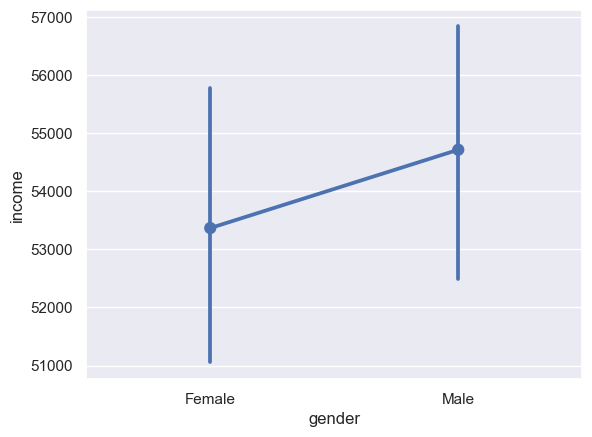

In [97]:
sns.pointplot(x = 'gender', y = 'income', data = df)

### The related samples _t_ test

Use this when both groups have the same members

In [98]:
df_ = df[(df['condition'] == 'Condition1') | (df['condition'] == 'Condition2')] # removes Condition3 

ttest_rel = pg.pairwise_tests(dv='income', within = 'condition', subject = 'participant', data=df_)
ttest_rel

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,condition,Condition1,Condition2,True,True,1.360412,199.0,two-sided,0.175239,0.196,0.139548


# 2. The ANOVA (analysis of variance): Comparing the means of multiple groups

Use this to compare the means of multiple groups

### The one-way ANOVA

Use this when comparing the means of multiple groups with no common participants

In [99]:
anova = pg.anova(dv = 'score', between = 'condition', data = df)
anova

,Source,ddof1,ddof2,F,p-unc,np2
0,condition,2,597,0.1958,0.822229,0.000656


<Axes: xlabel='condition', ylabel='score'>

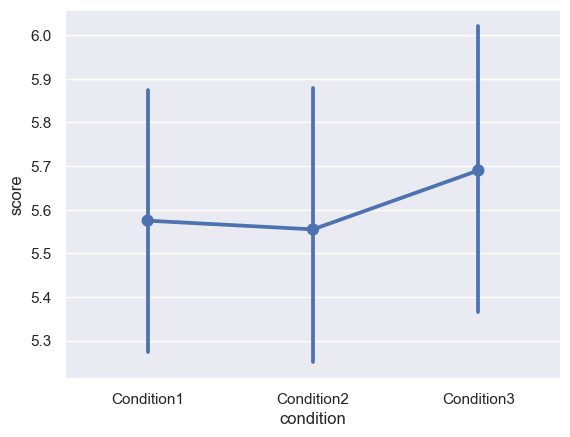

In [100]:
sns.pointplot(x = 'condition', y = 'score', data = df)

### The repeat-measures ANOVA

Use this when comparing the means of multiple groups when participants are present in all groups

In [101]:
aov_rm = pg.rm_anova(dv='income', within='condition', subject= 'participant', data=df)
aov_rm

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,condition,2,398,2.852653,0.058871,0.009092,0.983448


# 3. The linear regression

Used to evaluate the effect of continuous or categorical variables on a continuous variable

### The simple linear regression

Used to evaluate the effect of continuous independent variable on a continuous dependent variable

In [102]:
reg = pg.linear_regression(df['score'], df['income'])
reg

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,55951.395006,2163.963702,25.855977,1.595799e-99,0.001537,-0.000133,51701.502517,60201.287495
1,score,-342.103747,356.557405,-0.959463,3.377132e-01,0.001537,-0.000133,-1042.360703,358.153210


<Axes: xlabel='age', ylabel='income'>

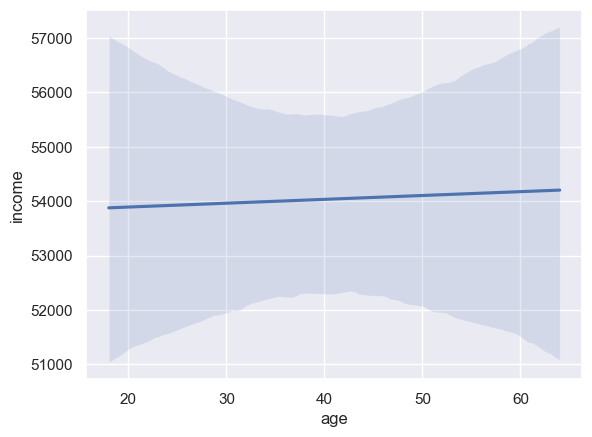

In [103]:
sns.regplot(x = 'age', y = 'income', scatter = False, data = df)

### The multiple linear regression

Used to Used to evaluate the effect of several independent variables on a continuous dependent variable

In [ ]:
mul_reg = pg.linear_regression(df[['age', 'score']], df['income'])
mul_reg

# 4. The $\chi^2$ test

This is used to evaluate whether two categoricial variables are related.

In [ ]:
stats = pg.chi2_independence(df, x='gender', y='favourite_colour')
stats

In [ ]:
sns.heatmap(pd.crosstab(df['gender'], df['favourite_colour']))